In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

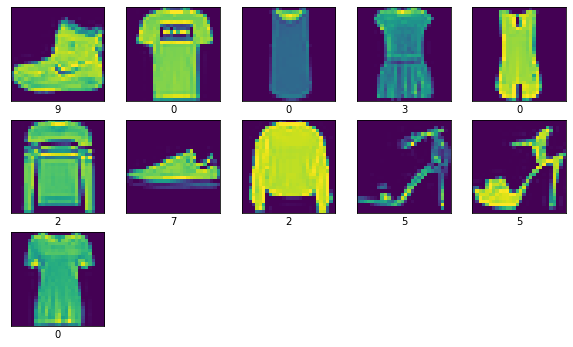

In [99]:
# visualization
plt.figure(figsize=(10, 10))
for i in range(11):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])

plt.show()

In [0]:
# nomalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [101]:
x_train.shape
height, width = x_train.shape[1:]
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Build neural network
model = Sequential([
    layers.Flatten(input_shape=(height, width)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=num_labels, activation='softmax')
]) 

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6222 - accuracy: 0.7861 - val_loss: 0.5409 - val_accuracy: 0.8073
Epoch 2/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.4319 - accuracy: 0.8459 - val_loss: 0.4220 - val_accuracy: 0.8473
Epoch 3/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3841 - accuracy: 0.8628 - val_loss: 0.4002 - val_accuracy: 0.8531
Epoch 4/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3568 - accuracy: 0.8719 - val_loss: 0.3875 - val_accuracy: 0.8592
Epoch 5/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3356 - accuracy: 0.8787 - val_loss: 0.3719 - val_accuracy: 0.8641
Epoch 6/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3195 - accuracy: 0.8844 - val_loss: 0.3666 - val_accuracy: 0.8649
Epoch 7/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3059 - accuracy: 0.8882 - val_loss: 0.4212 - val_accuracy:

In [105]:
accuracy = model.evaluate(x_test, y_test)
print('Accuracy', accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8757
Accuracy [0.34165966510772705, 0.8756999969482422]
